### **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    ### import all the libraries
from  sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns",None)

In [5]:
telecom = pd.read_csv("telecom_customer_segmentation.csv")

### **Data Preprocessing**

A telecom company wants to segment its customer base to provide personalized services and offers. The goal is to group similar customers together based on their usage behavior, demographics, and preferences using clustering techniques. This segmentation will help the company better target marketing campaigns, reduce churn, and improve customer satisfaction.

In [ ]:
# Null Values
telecom.isnull().sum()

Region                  0
Gender                  0
SubscriptionType        0
InternetUsageType       0
CustomerSupportCalls    0
ContractType            0
MonthlyCharges          0
TotalCharges            0
CallMinutesPerMonth     0
InternetGBPerMonth      0
NumberOfSMSPerMonth     0
TenureMonths            0
Age                     0
dtype: int64

In [ ]:
# Duplicated Values
telecom[telecom.duplicated()]

,Region,Gender,SubscriptionType,InternetUsageType,CustomerSupportCalls,ContractType,MonthlyCharges,TotalCharges,CallMinutesPerMonth,InternetGBPerMonth,NumberOfSMSPerMonth,TenureMonths,Age


### **One Hot Encoding**

In [9]:
telecom.select_dtypes(include="object").columns

Index(['Region', 'Gender', 'SubscriptionType', 'InternetUsageType',
       'CustomerSupportCalls', 'ContractType'],
      dtype='object')

In [10]:
cat = telecom.select_dtypes(include="object").columns

In [ ]:
# Checking different numbers of unique values in each category
for i in cat:
    print(telecom[i].unique())

['West' 'Central' 'East' 'South' 'North-East' 'North']
['Other' 'Male' 'Female']
['Postpaid' 'Prepaid']
['Light' 'Heavy' 'Moderate']
['High' 'Medium' 'Low']
['Monthly' 'Quarterly' 'Yearly']


In [ ]:
# Encoding Columns
# 1st Region has 6 unique values and are nominal in nature using One-Hot Encoding
pd.get_dummies(telecom["Region"]).astype("int64") # Astype is used to convert bool to numberic


,Central,East,North,North-East,South,West
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
99995,0,0,0,1,0,0
99996,1,0,0,0,0,0
99997,0,0,0,0,0,1
99998,0,0,1,0,0,0


In [ ]:
# Adding the encoded columns and dropping the actual columns i.e. Region
telecom=pd.concat([pd.get_dummies(telecom["Region"]).astype("int64"),telecom],axis=1)
telecom.drop("Region",axis=1,inplace=True)

In [ ]:
## Similary columns ContractType and Gender are nominal in nature 
telecom=pd.concat([pd.get_dummies(telecom["Gender"]).astype("int64"),telecom],axis=1)
telecom.drop("Gender",axis=1,inplace=True)

In [15]:
telecom=pd.concat([pd.get_dummies(telecom["ContractType"]).astype("int64"),telecom],axis=1)
telecom.drop("ContractType",axis=1,inplace=True)

In [16]:
telecom["CustomerSupportCalls"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [ ]:
# Columns: CustomerSupport Calls, InternetUsageType are ordinal in nature so we are using the label encoding using the lambda function
telecom['CustomerSupportCalls'] = telecom['CustomerSupportCalls'].apply(lambda x : 3 if x == 'High' else 2 if x == 'Medium' else 1)

In [19]:
telecom["CustomerSupportCalls"].unique()

array([3, 2, 1])

In [ ]:
# Columns: CustomerSupport Calls, InternetUsageType are ordinal in nature so we are using the label encoding using the lambda function
telecom['InternetUsageType'] = telecom['InternetUsageType'].apply(lambda x : 3 if x == 'Heavy' else 2 if x == 'Moderate' else 1)

In [22]:
telecom["SubscriptionType"]=telecom["SubscriptionType"].apply(lambda x:1 if x=='Postpaid'
                                                             else 0)

### **Data Standardization**

In [24]:
Sample= telecom.sample(10000,random_state=34)

In [25]:
s= StandardScaler()

In [26]:
for i in telecom.columns:
    Sample[i]=s.fit_transform(Sample[[i]])

In [27]:
wcss=[]

In [ ]:
for i in range(2,7):
    k = KMeans(n_clusters=i,random_state=34)
    k.fit(Sample)
    wcss.append(k.inertia_)

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


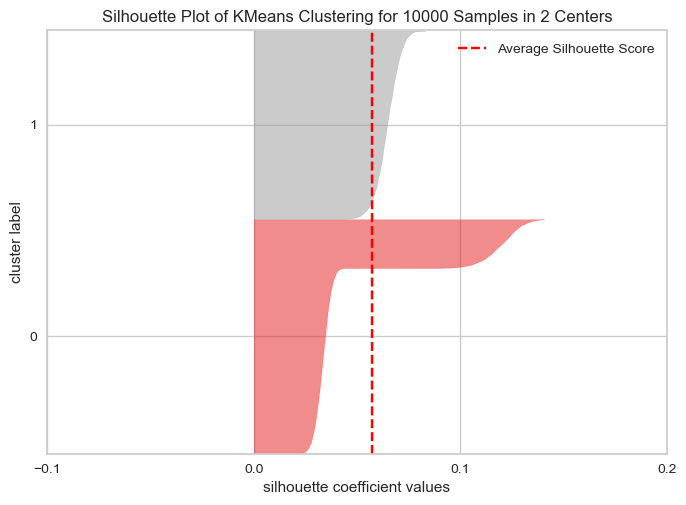

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


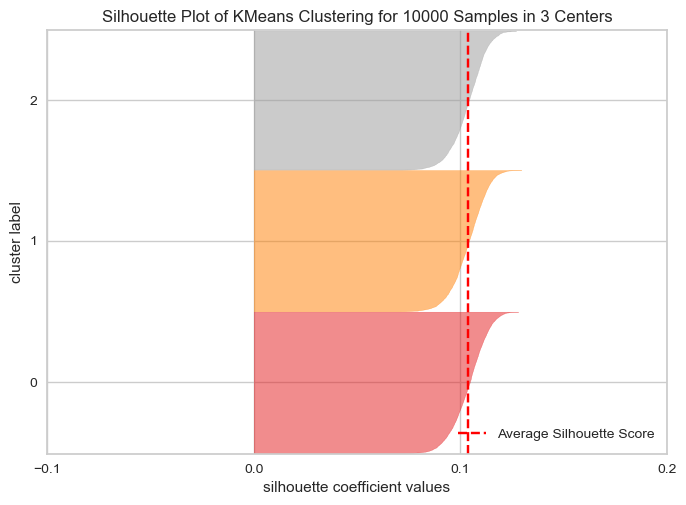

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


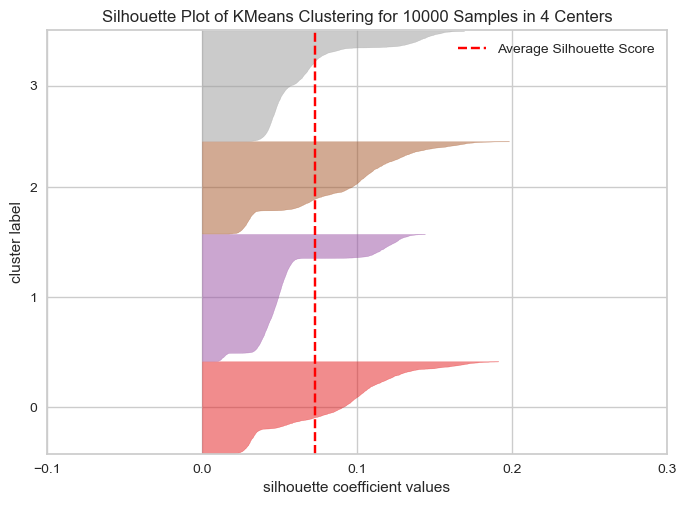

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


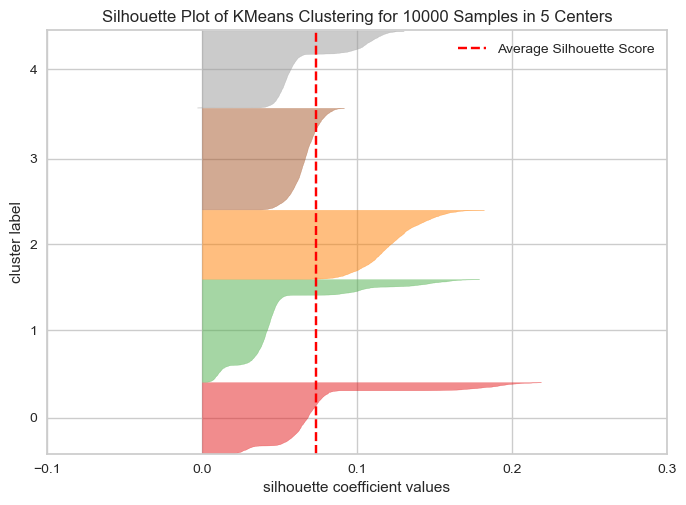

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


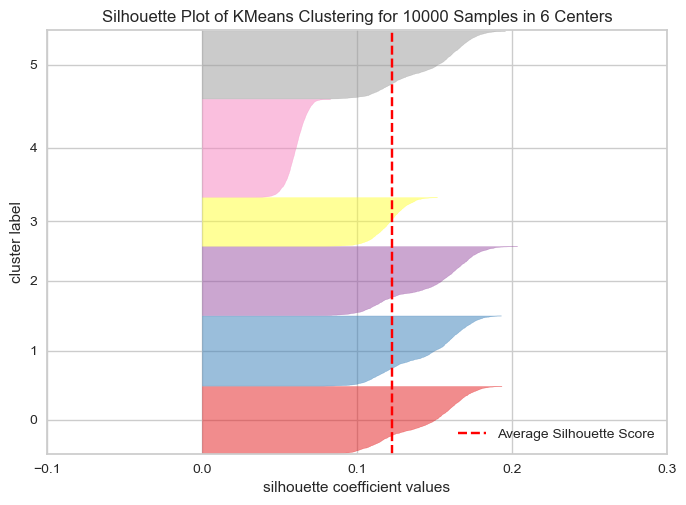

In [27]:
for i in range(2,7):
    k = KMeans(n_clusters=i,random_state=34)
    k.fit(Sample)
    silhouette_visualizer(k,Sample)

Text(0, 0.5, 'WCSS value')

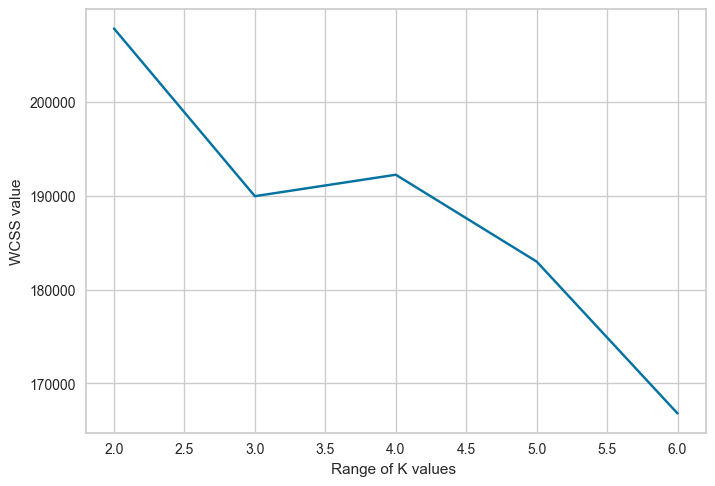

In [30]:
plt.plot(range(2,7),wcss)
plt.xlabel("Range of K values ")
plt.ylabel("WCSS value")
## 3 from elbow plot 

## **K - Means Clustering**

In [32]:
k = KMeans(n_clusters=3,random_state=34)

In [33]:
k.fit(Sample)

KMeans(n_clusters=3, random_state=34)

In [34]:
Sample.reset_index(inplace=True)

In [35]:
Sample.drop("index",axis=1,inplace=True
           )

In [36]:
len(k.labels_)

10000

In [37]:
x= pd.DataFrame(k.labels_,columns=["Class"])

In [38]:
Sample=pd.concat([Sample,x],axis=1)

In [39]:
Sample

,Monthly,Quarterly,Yearly,Female,Male,Other,Central,East,North,North-East,South,West,SubscriptionType,InternetUsageType,CustomerSupportCalls,MonthlyCharges,TotalCharges,CallMinutesPerMonth,InternetGBPerMonth,NumberOfSMSPerMonth,TenureMonths,Age,Class
0,1.406401,-0.700858,-0.709442,-0.702921,1.406401,-0.707372,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,1.212011,1.23128,0.330467,0.438320,-0.668245,-0.025522,0.131560,1.382801,1.029695,0
1,-0.711035,1.426823,-0.709442,-0.702921,1.406401,-0.707372,-0.436436,-0.44259,2.234995,-0.438545,-0.453211,-0.464867,0.988862,1.212011,1.23128,-0.641618,0.218913,0.613610,0.181782,-0.605696,0.219875,-0.706872,2
2,1.406401,-0.700858,-0.709442,-0.702921,1.406401,-0.707372,-0.436436,-0.44259,-0.447428,-0.438545,2.206478,-0.464867,-1.011263,-0.011872,1.23128,1.767058,0.321168,1.060860,-1.279460,-0.806765,0.946704,-0.034653,0
3,-0.711035,1.426823,-0.709442,-0.702921,1.406401,-0.707372,-0.436436,-0.44259,-0.447428,2.280269,-0.453211,-0.464867,-1.011263,-0.011872,0.00953,-0.047898,2.361137,1.445456,0.444704,-0.538672,-1.039961,-1.659183,2
4,-0.711035,-0.700858,1.409559,-0.702921,-0.711035,1.413683,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,-1.235755,-1.21222,0.140290,-0.086088,-0.281580,0.589312,1.203932,1.479711,-0.650854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.406401,-0.700858,-0.709442,-0.702921,-0.711035,1.413683,-0.436436,-0.44259,-0.447428,-0.438545,2.206478,-0.464867,-1.011263,-1.235755,0.00953,0.170109,-1.923751,-0.826949,-0.345074,0.031025,-0.749229,1.477841,0
9996,1.406401,-0.700858,-0.709442,-0.702921,1.406401,-0.707372,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,-0.011872,0.00953,-0.631016,-1.277450,-1.336460,0.504368,2.410350,0.946704,0.245439,0
9997,-0.711035,-0.700858,1.409559,-0.702921,1.406401,-0.707372,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,1.212011,-1.21222,0.927500,1.058853,1.097606,1.992913,-0.203556,1.479711,0.245439,1
9998,-0.711035,1.426823,-0.709442,1.422634,-0.711035,-0.707372,-0.436436,-0.44259,2.234995,-0.438545,-0.453211,-0.464867,-1.011263,-0.011872,0.00953,-3.114570,0.524728,-0.552492,0.295041,-0.170045,0.995159,-1.211037,2


<Axes: xlabel='InternetGBPerMonth', ylabel='TotalCharges'>

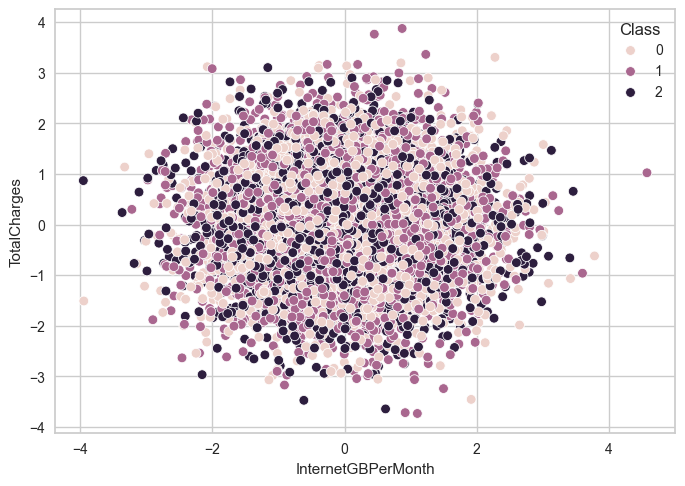

In [40]:
sns.scatterplot(x=Sample["InternetGBPerMonth"],y=Sample["TotalCharges"],hue=Sample["Class"])

In [41]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage


In [42]:
Z = linkage(Sample)

{'icoord': [[125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [95.0, 95.0, 113.75, 113.75],
  [85.0, 85.0, 104.375, 104.375],
  [75.0, 75.0, 94.6875, 94.6875],
  [65.0, 65.0, 84.84375, 84.84375],
  [55.0, 55.0, 74.921875, 74.921875],
  [45.0, 45.0, 64.9609375, 64.9609375],
  [35.0, 35.0, 54.98046875, 54.98046875],
  [25.0, 25.0, 44.990234375, 44.990234375],
  [15.0, 15.0, 34.9951171875, 34.9951171875],
  [5.0, 5.0, 24.99755859375, 24.99755859375]],
 'dcoord': [[0.0,
   np.float64(3.807388601937626),
   np.float64(3.807388601937626),
   0.0],
  [0.0,
   np.float64(3.808167523135113),
   np.float64(3.808167523135113),
   np.float64(3.807388601937626)],
  [0.0,
   np.float64(3.814179367449462),
   np.float64(3.814179367449462),
   np.float64(3.808167523135113)],
  [0.0,
   np.float64(3.82194762222632),
   np.float64(3.82194762222632),
   np.float64(3.814179367449462)],
  [0.0,
   np.float64(3.825432276562036),
   np.float64(3.825432276562036),

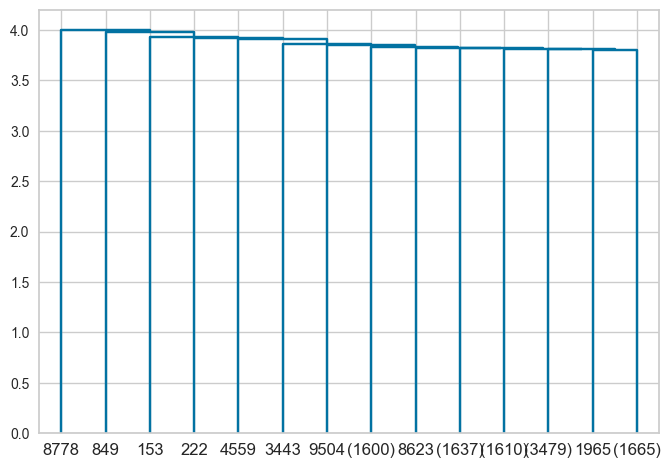

In [43]:
dendrogram(Z,truncate_mode='lastp',p=14)

In [44]:
ag = AgglomerativeClustering(n_clusters=3)
ag.fit(Sample)

AgglomerativeClustering(n_clusters=3)

In [46]:
x = pd.DataFrame(ag.labels_,columns=["Class_2"])
Sample= pd.concat([Sample,x],axis=1)
Sample

,Monthly,Quarterly,Yearly,Female,Male,Other,Central,East,North,North-East,South,West,SubscriptionType,InternetUsageType,CustomerSupportCalls,MonthlyCharges,TotalCharges,CallMinutesPerMonth,InternetGBPerMonth,NumberOfSMSPerMonth,TenureMonths,Age,Class,Class_2
0,1.406401,-0.700858,-0.709442,-0.702921,1.406401,-0.707372,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,1.212011,1.23128,0.330467,0.438320,-0.668245,-0.025522,0.131560,1.382801,1.029695,0,0
1,-0.711035,1.426823,-0.709442,-0.702921,1.406401,-0.707372,-0.436436,-0.44259,2.234995,-0.438545,-0.453211,-0.464867,0.988862,1.212011,1.23128,-0.641618,0.218913,0.613610,0.181782,-0.605696,0.219875,-0.706872,2,0
2,1.406401,-0.700858,-0.709442,-0.702921,1.406401,-0.707372,-0.436436,-0.44259,-0.447428,-0.438545,2.206478,-0.464867,-1.011263,-0.011872,1.23128,1.767058,0.321168,1.060860,-1.279460,-0.806765,0.946704,-0.034653,0,2
3,-0.711035,1.426823,-0.709442,-0.702921,1.406401,-0.707372,-0.436436,-0.44259,-0.447428,2.280269,-0.453211,-0.464867,-1.011263,-0.011872,0.00953,-0.047898,2.361137,1.445456,0.444704,-0.538672,-1.039961,-1.659183,2,0
4,-0.711035,-0.700858,1.409559,-0.702921,-0.711035,1.413683,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,-1.235755,-1.21222,0.140290,-0.086088,-0.281580,0.589312,1.203932,1.479711,-0.650854,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.406401,-0.700858,-0.709442,-0.702921,-0.711035,1.413683,-0.436436,-0.44259,-0.447428,-0.438545,2.206478,-0.464867,-1.011263,-1.235755,0.00953,0.170109,-1.923751,-0.826949,-0.345074,0.031025,-0.749229,1.477841,0,2
9996,1.406401,-0.700858,-0.709442,-0.702921,1.406401,-0.707372,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,-0.011872,0.00953,-0.631016,-1.277450,-1.336460,0.504368,2.410350,0.946704,0.245439,0,0
9997,-0.711035,-0.700858,1.409559,-0.702921,1.406401,-0.707372,2.291288,-0.44259,-0.447428,-0.438545,-0.453211,-0.464867,-1.011263,1.212011,-1.21222,0.927500,1.058853,1.097606,1.992913,-0.203556,1.479711,0.245439,1,0
9998,-0.711035,1.426823,-0.709442,1.422634,-0.711035,-0.707372,-0.436436,-0.44259,2.234995,-0.438545,-0.453211,-0.464867,-1.011263,-0.011872,0.00953,-3.114570,0.524728,-0.552492,0.295041,-0.170045,0.995159,-1.211037,2,0


<Axes: xlabel='InternetGBPerMonth', ylabel='TotalCharges'>

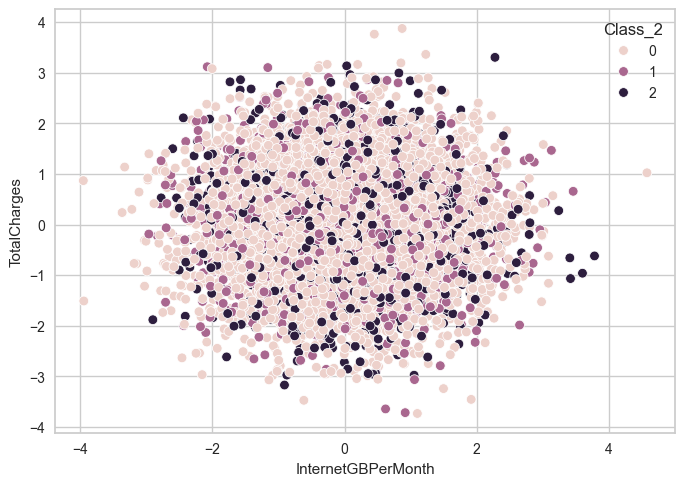

In [47]:
sns.scatterplot(x=Sample["InternetGBPerMonth"],y=Sample["TotalCharges"],hue=Sample["Class_2"])

In [48]:
db = DBSCAN(eps=0.8,min_samples=5)
db.fit(Sample)

DBSCAN(eps=0.8)

In [49]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [50]:
x= pd.DataFrame(db.labels_,columns=["Class_23"])
Sample= pd.concat([Sample,x],axis=1)
Sample["Class_23"].unique()

array([-1])